# DRAFT -- comments welcome  cmason@berkeley.edu

Demography 88<br>
Fall 2017<br>
Carl Mason (cmason@berkeley.edu)<br>
## Lab 2:  Fertility, immigration and early 20th Century Nativisim

##### All answers should be submitted by noon Monday Sept. 16

In [5]:
# Run this cell to import the stuff we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline


from datascience import Table
from datascience.predicates import are
from IPython.display import HTML, IFrame, display
datasite="http://courses.demog.berkeley.edu/mason88/data/"
quizsite="http://courses.demog.berkeley.edu/mason88/cgi-bin/quiz.py"
  
def cquiz(qno) : 
    import IPython, requests 
    try:
        sid
    except NameError: 
        print("HEY! did you enter your sid way up at the top of this notebook?")
    Linkit='{0}?qno={1}&sid={2}'.format(quizsite,qno,sid)
    #print(Linkit)
    html = requests.get(Linkit)
    display(IFrame(Linkit, 1000, 300))
    

    
######################
# Here it is ... the obvious place to put your student id
sid=""
######################
if sid == "" :
    print("HEY! didn't I tell you to put your sid in the obvious place")
 

HEY! didn't I tell you to put your sid in the obvious place


In [2]:
#HIDE>
sid='010183401'
#HIDE<

In [ ]:
### #### #### ####
###  SELECTING  LAB  PARTNERS
### ### #### ####

N=24
numbers=np.arange(N)
print(np.mod(N,2))
if (not np.mod(N,2) == 0) :
    numbers=np.append(numbers,"lucky")
    N+=1
numbersTab=Table().with_column('n',numbers)
randomized=numbersTab.sample(k=N,with_replacement=False)
selection=randomized['n']
selection.shape = (2,int(N/2))
Table().with_columns('zero',selection[0],'one',selection[1]).show()

In [3]:
## Tell us with whom you are partnering today


In [6]:
cquiz('fert0-partners')

# Part 1 Fertility decline and the rise of early 20th Century nativism

We read Francis Walker's article about immigration and it's terrible effects on US born, among which is fertility decline. In part one of today's lab/discussion we will explore the context in which Walker wrote and the subsequent development of a constellation of ideas that resulted in a new rise of a particularly ugly sort of nativism rooted in scientific racism and eugenics. 

Among the surprising aspects of these developments are that they are driven forward by scientific breakthroughs and leaders of the Progressive Movement.


### Outline

1. From the 19th to the 20th Century -- fertility decline feeds hostility to immigrants.
    1. Francis Walker and the late 19th Century context
        1. The Immigration Restriction League
        1. Anglo-Saxon "superiority"
    1. Progressivism and scientific racism in the early 20th Century  
        1. Race suicide and eugenics
        1. Restrictive immigration legislation
1. Fertility in the 21st Century
    1. Computing age specific fertility rates and total fertility 
        1. To take account of/remove the effect of the population age structures
        2. To compare the fertility behavior of populations and groups
1. Assignment: To assess the extent to which  fertility differences between immigrant and US born women are explainable by factors other than immigrant status .e.g education 
  


# Background : The angst filled late 19th Century

1. Economic depression of the 1890s
    1. Unemployment ~ 18 percent in 1894
    1. Labor unrest 
    1. Anarchists
1. Guilded Age inequality
1. Turner Hypothesis -- The country is full

1. Decline of WASP power
    1. Democratic city political machines
    1. Highly diverse urban populations
        
        ==> slow rise of anti-immigrant sentiment
        
           

In [ ]:
#HIDE>
# Anti immigrant sentiment isn't new:
## anti-catholic 1830-60 ; anti-Chinese 1849.. still raging (but there were few chinese ) 
## but before 20c immigration is still seen as nec in order to fill all that land and all those factories

## Walker captures the angst filled sentiment of late 19C wasp-dom

## while walker is not the first to declare his anti-immigration position (IRL founded 1890)  his ideas are 
## milestone in **PROGRESSIVE** thinking


#HIDE<

### Francis Walker

1. Boston patrician family born 1840
1. Distinguished civil war veteran
1. Scholar of Economics and Military History
1. Superintendent of Census of 1870
1. President of ASA, AEA, MIT

#  Francis Walker makes one of the first argument for immigration restriction.

<img src="http://courses.demog.berkeley.edu/mason88/images/walker01.jpg">

In [ ]:
#HIDE>
# prior to Walker,  there were laws against:
#  chinese immigration, 
#  contract labor, 
#  loathsome diseases
# *BUT ** the strong concensus had been that immigration itself was a good thing -- even at 
#  the height of the Know-Nothing era (early 1850s) they called only for long waits for 
#  naturalization. 
## And Post Civil War -- the anti-catholic sentiment declined in light of heroism and sacrifice
# of immigrants and familiarity (rise of 2nd Gen) + powerful politicians.
#HIDE<

# The progressive movement

## A broad and contradictory movement held together by a few ideas:


1. Pragmatic optimism :  a belief that experts can fix things.
1. Worship of efficiency: 
    1. Frederick W. Taylor and  "scientific management".
    1. Big manufacturing enterprises and economies of scale
1. Awe of numbers :
    1. Immigration restriction league is the first "think tank" 
    1. Dillingham Commission Report (1911)
1. Upper Class WASP sensibilities  (not an embrace of diversity)
    1. Americanization movement
    1. Settlement house movement
    


In [ ]:
#HIDE>
# 

# Early 20th Century



### (Overlooking the Chinese case)...After a post Civil War respite-- during which immigrants were mostly welcomed-- economic and social crises in the 1890s sparks a resurgence of anti-immigrant sentiment. 

### Rediscovery of Gregor Mendel's work impels pretty good scientists towards biologically deterministic ideas. “progressives” embrace science, numbers, and biological determinism AND imperialism, racism and immigration restriction.

### Asylum for mankind and equality do poorly during the Progressive Era.

# Part 2 : Comparing fertility of immigrants and the US born

As we discussed in class, fertility and immigration are the only ways that a population can grow.  We also saw the Francis Walker reading,  the degree to which one or the other drives population growth has been a contentious issue in the United States since at least the late 19th Century.  Walker and particularly later writers inspired by him, also drew attention to the fact that immigrant women could have different fertility patterns -- and that above and beyond the effect of immigration itself, would further change both the growth rate and the nature of the populaiton.

Then as today,  to people who are concerned about these sorts of issues, being able to characterize fertility patterns in a way that allows us to quantify fertility behavior abstracting from the effects of the population age structure is an important data sciency thing to do.


The objectives of this lab are the following:

1. To learn how demographers measure fertility in a way that allows us to:
    1. Take account of/remove the effect of the population age structures
    2. Compare the fertility behavior of populations and groups
1. To assess the extent to which  fertility differences between immigrant and US born women are explainable by factors other than immigrant status .e.g education 


 

The dataset that we will use today is from the 2015 American Communities Survey (ACS) which is released by the US Census Bureau annually -- sampling is done from the complete list of dwellings/households that the Census Bureau manintains in order to do the decenial census.  To reduce cost while covering the entire country, the ACS does  not use a simple random sample and it follows therefrom that one *SHOULD* always apply sampling weights to all computations using these data.  But we don't have time for that this week.  Since the analysis that we are doing this week will not be materially affected by weights we're going to *pretend* that the data are a simple random sample.  As long as we don't accidently publish our results -- we'll be OK.

The source of the dataset that we'll use today is the Integrated Public Use Microseries project (IPUMS) at the Minnesota Population Center.  IPUMS is a magnificent project for young data scientists of all kinds.  You'll hear more about it later,  for now,  here's the citation:

>Steven Ruggles, Katie Genadek, Ronald Goeken, Josiah Grover, and Matthew Sobek. Integrated Public Use Microdata Series: Version 6.0 [dataset]. Minneapolis: University of Minnesota, 2015. http://doi.org/10.18128/D010.V6.0.

<hr>
### NOTE on strategy:
Like past labs, this one uses some tools that you have not seen yet in the foundation course.  This can make one a little nervous, but that is not the intent.  While we will spend some time discussing and explaining how the python works -- <b> IT IS NOT NECESSARY that you master it</b>.  The obscure bits of python-that-you-can-learn-about-later  are all wrapped in function. As long as you understand how to *use* the function, it is not necessary to understand how it works.


In [8]:
## acquire the data -- US resident women aged 15 to 45 from the 2015 5-year ACS
fert=Table().read_table(datasite+"acsWomen15_45.csv")
fert.show(5)
# recode the fertyr column to be 1 if Yes 0 if No



statefip,region,educ,fertyr,AGE,YRSUSA1,citizen,race,hispan,raceEth,EDUC,CITIZEN
Alabama,East South Central Div.,5+ years of college,No,35,0,US Born,White,Not Hispanic,NH:White,11,0
Alabama,East South Central Div.,4 years of college,No,25,0,US Born,White,Not Hispanic,NH:White,10,0
Alabama,East South Central Div.,5+ years of college,No,32,0,US Born,White,Not Hispanic,NH:White,11,0
Alabama,East South Central Div.,4 years of college,No,27,27,Born abroad of American parents,Black/Negro,Not Hispanic,NH:Black,10,1
Alabama,East South Central Div.,Grade 12,No,37,0,US Born,Black/Negro,Not Hispanic,NH:Black,6,0


In [9]:
# the fert table represents a 1% sample of US resident women aged 15-45 
# Consider what the following code might be trying to tell us
(fert['fertyr']=='Yes').sum()*(1/.01)  # 5% sample
(fert['fertyr']=='Yes').mean()



0.058853200420624266

In [7]:
cquiz('fert0-01')

# Exploring the dataset that we just read

## fertyr is just one of the variables in the fert dataset.

Ther fert dataset contains 584,845 observations each of which represents a US resident woman sampled in a ranomd way. In addition to the fertyr question, respondents were asked about eduction, income, and host of other things. 

The code below determines which columns in fert are numerical and which are categorical by checking .dtype then for the numerical variables it uses the now perhaps familar .stats() method to compute mean, min and max.  For categorical ones it uses a methoc for a module called 'pandas'.  The method is called .crosstab() and it simply counts up the frequency of each unique value in a categorical variable.  

Just try to get the gist of how the code works -- and remember that later in life, when you need to do this sort of thing for yourself... you will have seen it before.

For this lab, just scan the result of the code to get a sense of what variables are available
and maybe later on,  take a look at documentation which  can be found at http://ipums.org

#####  Note that some of the variables in this dataset have lowercase names and some have UPPER case names.  The upper case variables come directly from IPUMS and are encoded as numbers -- whether the values represent quantities e.g. AGE or categories e.g. CITIZEN.   The lower case variables were constructed by your instructor. Generally it was a matter of substituting a meaningful text string in place of an integer -- see for example CITIZEN and citizen.



In [9]:
## Crosstabs and descriptive statistics
# don't worry about how this is done -- unless you want to.
#  The output is what's important -- it shows frequency counts for the categorical variables
#  and descriptive stats for the continuous ones
import re
import pandas as pd
## list of numerical columns
## this is so-called list comprehension 
nums=[i for i in list(fert) if fert[i].dtype == 'int64']
## list of categorical columns
cats=[i  for i in list(fert) if re.match('\<',str(fert[i].dtype))]

#descriptive statistics for things numerical
fert.select(nums).stats().show()
#frequencies of things categorical
for i in cats:
    print("\n\n"+i+"\n")
    print(pd.crosstab(fert[i],columns="count"))



statistic,AGE,YRSUSA1,EDUC,CITIZEN
min,15,0,0,0
max,45,46,11,3
median,30,0,7,0
sum,1.74789e+07,1.42499e+06,4.2272e+06,229251




statefip

col_0                 count
row_0                      
Alabama                8475
Alaska                 1222
Arizona               12207
Arkansas               5204
California            75156
Colorado              10191
Connecticut            6449
Delaware               1539
District of Columbia   1818
Florida               33128
Georgia               19077
Hawaii                 2601
Idaho                  2811
Illinois              23841
Indiana               12163
Iowa                   5434
Kansas                 4994
Kentucky               7949
Louisiana              8148
Maine                  1999
Maryland              11312
Massachusetts         13714
Michigan              16956
Minnesota              9269
Mississippi            5465
Missouri              11102
Montana                1520
Nebraska               3264
Nevada                 5101
New Hampshire          2226
New Jersey            16182
New Mexico             3445
New York              38060
North Ca

In [10]:
cquiz('fert0-02')

## Adding some useful recoding  and computing a  birth rate

####  In order to work with these data we'll need to change the way the information is stored.  There is some regretably obscure python here,  but your not enthusiastic about mastering it that's ok, you can just knod your head as long as you understand what the code  is supposed to do.

First we'll need to do some simple recoding in order to convert some of the variables
that we explored above into 1/0 form rather than 'Yes/No' .

Then we'll use those new versions of the variables to measure the differnce between immigrant and
US born womens' fertility


##### A note on the code: 

This sort of expression....

  [x**2 for x in np.arange(10)]
  
is called, by pythonistas, a "list comprehnsion".  the "list" part of that phrase is because these structures always
produce a list,  and "comprehension" follows from  the mathematical concept of a  "set comprehension" which is not really important for us right now.  What is important is to understand that a <i>list comprehension</i> is a way of defining the elements of a list in terms of a different list (or sequence).  In the above case the list comprehension defines the resulting list as the square $(x**2)$ of each element of the sequence of integers from 0 to 9 (np.arange(10)).  The 'x' is an arbitrarily chosen symbol which takes on each value of np.arange(10) one at a time.

The list comprehensions that we use below are just slightly more complicated in that they have an if/else. List comprehensions can get considerably more complicated. Sorry.


In [14]:
[x**2 for x in np.arange(10)]


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [24]:
# Yes/No is not as convenient as 1/0 for many purposes
fert.append_column('fert10',[ 1 if x=="Yes" else 0 for x in fert['fertyr']])
# From the above "exploration" you can see that citizen has 4 categories
# we can map it into 2 categories most easily by  using the numerical version CITIZEN rather
# than the string text version, citizen
fert.append_column('immig',[1 if x >=2 else 0 for x in fert['CITIZEN']])
fert.select(['AGE','race','fertyr','fert10','CITIZEN','immig']).show(10)

AGE,race,fertyr,fert10,CITIZEN,immig
35,White,No,0,0,0
25,White,No,0,0,0
32,White,No,0,0,0
27,Black/Negro,No,0,1,0
37,Black/Negro,No,0,0,0
18,White,No,0,0,0
45,Two major races,No,0,0,0
43,White,No,0,0,0
33,White,No,0,0,0
40,Black/Negro,No,0,0,0


## Now some questions about what you have just done.

In [13]:
cquiz('fert0-001')  

In [19]:
## Consider what these two expressions might do
brI=np.sum(fert.where('immig',1).column('fert10'))/np.sum(fert['immig']==1)
brN=np.sum(fert.where('immig',0).column('fert10'))/np.sum(fert['immig']==0)
print('Immigrants:{0} USborn:{1}'.format(brI,brN))

Immigrants:0.07048889718231013 USborn:0.056854223894562426


In [16]:
cquiz('fert0-1')

## Age specific fertility rates

We can improve on the above  measures by recognizing the life cycle nature of fertility.  For biological as well as social/economic reasons, women tend to have children in the 20s and 30s and less so in either their teens or 40s.  On a population scale,  this means that populations with relatively more women in their 20s and 30s will tend to have more children then populations with older age structures *even if individuals in those populations behave identically* over their life courses.  

So how shall we characterize the age pattern of fertility?  how about by computing a specific fertility rate for each age.  Condsider the following equation:

$$ASFR_a=\frac{births_a}{PYL_a}$$

where $ASFR_a$ is the age specific fertility rate of women of age $a$ over a particular period of time -- generally one year;  $births_a$ is the total number of births to all women in the population of age a (during the particular time period) And $PYL_a$  is the sum of the <i> person years lived</i> by women of age $a$ during the period over which the rate is being computed. 


The person-years lived concept is, what makes the ASFR a *rate* rather than a *probability*.  In the US in the 21st Century for women of childbearing age, there is very little difference between PYL and the number of women alive at the beginning of the year.  In more difficult times (for example nearly all of human history and many poor countries today) maternal death was/is both a social and a statistical problem of heart breaking magnitude.  The former obviously, but the latter because women with higher fertilty were also at greater risk of maternal death.

Fortunately in 2015 in the US PYL is quantitatively so close to  the number of women of the particular age at the beginning of the period (assuming that we are computing rates for a single year)  -- that we will simply use that figure in its place.  In other words, what we are going to compute is technically a probability -- that is numerically indistinguishable from a rate.

To compute AFSR, we'll break the problem into two pieces: 

1. The "numerator" will be the number of births to women of each age in the population during the year
2. The "denominator" will be the number of women at risk of giving birth at each age (times 1 year)

For each age, the ASFR will be the numerator divided by the denominator.

In [26]:
## the .groups() method divides the table 
numer=fert.select(['AGE','fert10']).groups(['AGE'],np.nansum)
numer.show(10)

AGE,fert10 nansum
15,77
16,133
17,206
18,367
19,615
20,832
21,1035
22,1281
23,1287
24,1467


In [27]:
denom=fert.select(['AGE','fert10']).groups(['AGE'],len)
denom.show(10)

AGE,fert10 len
15,19240
16,19424
17,19389
18,22403
19,21328
20,19585
21,18723
22,17881
23,17699
24,18068


So now we have a table called 'numer' for numerator and one called 'denom' for no particular reason ;).

The next step is to line the two tables up by AGE and dived the 'fert10 nansum' column of 'numer' (number of births) by the 'fert10 len' colun of denom (number of women).  

It would be awesome, and frankly not too much to expect, if we could just write
$ answer={numer}/{denom}$

and wind up with a table of excellent age specific fertility rates.  

But alas, it does not work that way in python. 

There are a few different ways to deal with this:

1. We could use nested for: loops in plain old python
2. We could do a .join() to zip the tables together 

The first choice is more straight forward... but only if you already know how for loops work in python. And anyway, the .join trick is a little more elegant, albeit more opaque.

In [28]:
ASF=numer.join('AGE',denom)
ASF.show(5)
ASF.append_column('rate',ASF['fert10 nansum']/ASF['fert10 len'])
ASF.show(5)

AGE,fert10 nansum,fert10 len
15,77,19240
16,133,19424
17,206,19389
18,367,22403
19,615,21328


AGE,fert10 nansum,fert10 len,rate
15,77,19240,0.00400208
16,133,19424,0.0068472
17,206,19389,0.0106246
18,367,22403,0.0163817
19,615,21328,0.0288353


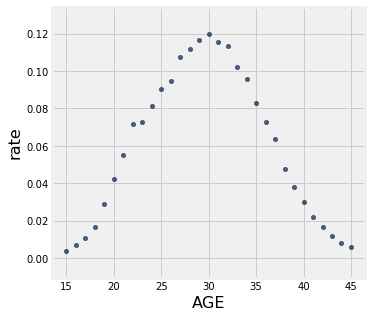

In [29]:
## And of course we can plot the ASF['rate']  with .scatter()
ASF.scatter('AGE','rate')

##  Reflect a moment on the shape of this graph

While it is tempting to think -- hey that's roughly a normal bell-shaped distribution,
it really isn't.  The above graph shows the average number of births experienced by women of
each age in 2015.  The shape happens to be a normal like shape -- but as we'll soon see, it's just a coincidence in this case.  What this graph is showing is the effect of age on the liklihood that a woman will give birth in a particular year. 



## The Total Fertility Rate 

the TFR is often referred to as "the number of children per woman".  Just like "life expectency"  that we enountered last week,  it's more complicated than it seems. Also like life expectency,  there is both a cohort and a period version. We are only looking at the preiod version today since cohort data on fertility is quite rare.

Once we have computed the age specific fertility rates,  TFR is quite easy to compute.

In [ ]:
# TFR stands for 'total fertility rate'  it is easy to compute once
# we have an array of age specific fertility rates
tfr=np.sum(ASF['rate'])
tfr

In [30]:
cquiz('fert0-04') 

## Going beyon AGE as a determinant of fertility

Age is a very big determinant of fertility behavior.  But there are other factors at play as well. 

We can learn about these other factors  by grouping our data according to characteristics of women and computing a separate ASF['rate'] for each group.

The coding is going to get a little more complicated,  but again -- just understand what the code is supposed to do.  We're going to build a function that encapulates the complexity of but which you can use as tool as long as you understand what it's supposed to do.

Let's start with education   

In [ ]:
## Below are two lines of code copied from above and modified to group by both AGE and education
## You'll need to fill in the ,<WHAT>s in order to make it work
numer=fert.select(['AGE','educ','fert10']).groups(['AGE','educ'],<WHAT>)
denom=fert.select(['AGE','educ','fert10']).groups(['AGE','educ'],<WHAT>)
#######
#HINT: the "<WHAT>" are the second argument of the .groups() method -- which should be
#  the name of a function
######

In [32]:
#HIDE>
## Below are two lines of code copied from above and modified to group by both AGE and education
## You'll need to fill in the ,<WHAT>s in order to make it work
numer=fert.select(['AGE','educ','fert10']).groups(['AGE','educ'],np.nansum)
denom=fert.select(['AGE','educ','fert10']).groups(['AGE','educ'],len)
#HIDE<

##  BECAUSE we are computing both numer and denom by AGE and educ, we'll need to perform  .join() matching on *both* variables.  

It is great bummer that the datascience.tables module does not provide this capability.
as a kludgy workaround -- that is deeply beneath our dignity -- we'll create a new variable called 'tempJoin that is the concatination of AGE and educ. This will uniquely identify each age/educ combination so that
we can do our .join()

####  Once again -- just focus on what the code is supposed to do.  We're writing a function so that we don't ever have to confront this problem again

Note on the code:

In the cell below, we create a function called concat (for concatenate) that simply takes two arguements turns them into strings and pastes them together with a _ in between. If functions are a new idea, then this is good time to ponder concat(). Functions are way of storing  a chunk of code  in such a way that we can reuse 
that code in other situations. In this case we use .apply() method create a new variable by executing the concat function on each row of fert using  'AGE' and 'educ' as arguments a and b

The resulting variable "tempJoin" will have a unique value for each combination of AGE and educ and that makes it exactly the thing we need in order .join() numer and denom

In [33]:
## Here's the function
def concat(a,b):
    """
    expects two arguments which can be turned into str; pastes them together with _ in between
    """
    return(str(a)+'_'+str(b))
## and here we use it to creat the tempJoin variable
numer.append_column('tempJoin', numer.apply(concat,'AGE','educ'))
denom.append_column('tempJoin', denom.apply(concat, 'AGE','educ'))

In [34]:
#HIDE>
## not using this as it is too difficult to explain
# numer.append_column('tempJoin',numer.apply(lambda a,e :str(a)+'_'+str(e), 'AGE','educ'))
# denom.append_column('tempJoin',denom.apply(lambda a,e :str(a)+'_'+str(e), 'AGE','educ'))
#HIDE<

In [35]:
## And here is the join
ASFeduc=numer.join('tempJoin',denom).drop(['AGE_2','educ_2'])
ASFeduc.append_column('rate',ASFeduc['fert10 nansum']/ASFeduc['fert10 len'])
ASFeduc.show(5)


tempJoin,AGE,educ,fert10 nansum,fert10 len,rate
15_Grade 10,15,Grade 10,14,3019,0.0046373
15_Grade 11,15,Grade 11,1,150,0.00666667
15_Grade 12,15,Grade 12,3,86,0.0348837
"15_Grade 5, 6, 7, or 8",15,"Grade 5, 6, 7, or 8",26,5409,0.0048068
15_Grade 9,15,Grade 9,33,10538,0.00313152


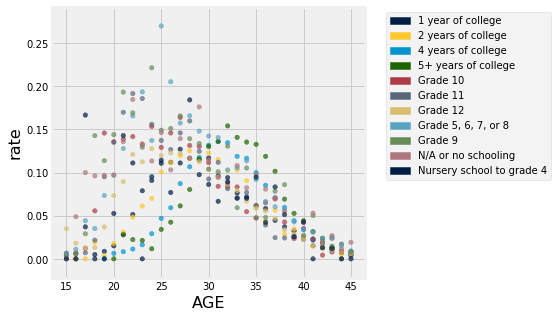

In [38]:
#And we can now graph ASFrate against AGE for each education category
ASFeduc.scatter('AGE','rate',colors='educ')

## Too much detail

It's not easy to see the relationship between education and fertility in this graph because there are too many categories of education. We can at least see the general pattern that fertility rises generally between the ages of 15 and maybe 25 or 30 and then declines.  And if you squint you can see that the light blue dots corresponding to 4 years of college are generally lower than the dots of most other colors.  But it's difficult to see much of a pattern with so many different colored dots.

Let's group the education variable in to broader categories in the hopes of seeing something clearer.

This also gives us a chance to do all the asfr calculations again 

In [40]:
## Look we're using the same trick as we used above with the concat function to create tempJoin
## here we create a function edRecode which takes a single argument 'ed' (which should be fert['educ'])
## and sets the value of out according to it.  Then the function returns 'out'. Just as above we use .apply()
## to execute the function on the value of educ in each row of fert.


def edRecode(ed):
    """
    simple function for recoding educ variable for use in an .apply()
    results in 3 levels of ed
    """
    if ed in ['Nursery school to grade 4', 'N/A or no schooling','Grade 9','Grade 5, 6, 7, or 8','Grade 10',
             'Grade 11'] :
        out='HSdropout'
    elif ed == 'Grade 12':
        out ='HighSchool'
    else:
        out="SomeCollege"
    return(out)


fert.append_column('educ2',fert.apply(edRecode,'educ'))


In [42]:
## Copying code from above ... AND changing every instance of educ to educ2

numer=fert.select(['AGE','educ2','fert10']).groups(['AGE','educ2'],np.nansum)
denom=fert.select(['AGE','educ2','fert10']).groups(['AGE','educ2'],len)
numer.append_column('tempJoin',numer.apply(concat, 'AGE','educ2'))
denom.append_column('tempJoin',denom.apply(concat, 'AGE','educ2'))

ASFeduc2=numer.join('tempJoin',denom).drop(['AGE_2','educ2_2'])
ASFeduc2.append_column('rate',ASFeduc2['fert10 nansum']/ASFeduc2['fert10 len'])
ASFeduc2.show(5)


tempJoin,AGE,educ2,fert10 nansum,fert10 len,rate
15_HSdropout,15,HSdropout,74,19154,0.00386342
15_HighSchool,15,HighSchool,3,86,0.0348837
16_HSdropout,16,HSdropout,129,19154,0.00673489
16_HighSchool,16,HighSchool,4,220,0.0181818
16_SomeCollege,16,SomeCollege,0,50,0


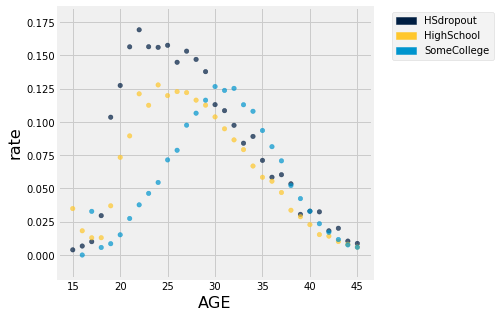

In [43]:
#And finally the scatter plot
ASFeduc2.scatter('AGE','rate',colors='educ2')

# Definitely easier to see whats going on

From this plot its clear that education is an important determinant of fertility.  At the very young ages where fertility is quite low, the pattern is unclear because few people under 18 have had a chance to attend college yet. By 25 education levels are fairly stable.

But how might we summarize the graph above into a single number that indicates the magnitude of the difference in fertility behavior at different education levels..?



In [44]:
cquiz('fert0-06') # This is a tough one

In [45]:
#HIDE>
res="""
TFR by education:
Some College:{0}
High Schoo:{1}
HS Dropout:{2}
""".format(np.sum(ASFeduc2.where('educ2','SomeCollege').column('rate')),
    np.sum(ASFeduc2.where('educ2','HighSchool').column('rate')),
    np.sum(ASFeduc2.where('educ2','HSdropout').column('rate')))
print(res)
#HIDE<


TFR by education:
Some College:1.7334997550613978
High Schoo:1.9641973495478962
HS Dropout:2.54781441640368



## So that's education -- but there are other variables that might make a difference too

But let's take a step back and consider how we might make this exercise more efficient -- so that we can easily plot those ASFrate curves for lots of different groups of women.  Do you think we might create a function for this task?

Very good!  

Let's take the code that we used to create the scatter plot of ASFrate vs AGE above wrap it into a function
that we can use to compute our asfr table for **any categorical variable in the fert table**.

In [ ]:
## Start by copying the entire cell that we used to generate asfr based on educ2 THEN:
## 1) add a def function() :   line to indicate that we are creating a function (done)
## 2) specify the argument of the function which shall be the categorical variable by which
##    we want to disagregate asfr cvar --the role of educ2 in the code (done) See next cell
##    for a discussion of the fert=fert bit  no need to worry about it just now.

######---------------(Left for you to do )-------------------------------------############
## 3) change the educ2 in the code to match the variable name that we selected, cvar 
##    HIMT:give some thought to how quote marks work
#####----------------------------------------------------------------------############
## 4) add return statement (done)
def genASFR(cvar,fert=fert):
    """
    computes asfr from fert disagregated by categorical varialble cvar
    WILL NOT WORK PROPERLY UNTIL 'educ2' is modified see above
    """
    numer=fert.select(['AGE','educ2','fert10']).groups(['AGE','educ2'],np.nansum)
    denom=fert.select(['AGE','educ2','fert10']).groups(['AGE','educ2'],len)
    #numer.append_column('tempj',numer.apply(lambda a,e :str(a)+'_'+str(e), 'AGE','educ2'))
    #denom.append_column('tempj',denom.apply(lambda a,e :str(a)+'_'+str(e), 'AGE','educ2'))
    numer.append_column('tempj',numer.apply(lambda a,e :str(a)+'_'+str(e), 'AGE','educ2'))
    denom.append_column('tempj',denom.apply(lambda a,e :str(a)+'_'+str(e), 'AGE','educ2'))asfr=numer.join('tempj',denom).drop(['AGE_2','educ2_2'])
    #asfr.show(5)
    asfr.append_column('rate',asfr['fert10 nansum']/asfr['fert10 len'])
    return(asfr)

In [46]:
#HIDE>
## Start by copying the entire cell that we used to generate asfr based on educ2 THEN:
## 1) add a def function() :   line to indicate that we are creating a function (done)
## 2) specify the argument of the function which shall be the categorical variable by which
##    we want to disagregate asfr --the role of educ2 in the code (done)
## 3) change the educ2 in the code to match the variable name that we selected, cvar (done)
## 4) change name of AGEeduc to 'tempj' not necessary but tidier (done)
## 5) add return statement (done)
def genASFR(cvar,fert=fert):
    """
    computes asfr from fert disagregated by categorical varialble cvar
    WILL NOT WORK PROPERLY UNTIL 'educ2' is modified see above
    """
    numer=fert.select(['AGE',cvar,'fert10']).groups(['AGE',cvar],np.nansum)
    denom=fert.select(['AGE',cvar,'fert10']).groups(['AGE',cvar],len)
    #numer.append_column('tempj',numer.apply(lambda a,e :str(a)+'_'+str(e), 'AGE',cvar))
    #denom.append_column('tempj',denom.apply(lambda a,e :str(a)+'_'+str(e), 'AGE',cvar))
    numer.append_column('tempj',numer.apply(concat , 'AGE',cvar))
    denom.append_column('tempj',denom.apply(concat, 'AGE',cvar))
    asfr=numer.join('tempj',denom).drop(['AGE_2','educ2_2'])
    #asfr.show(5)
    asfr.append_column('rate',asfr['fert10 nansum']/asfr['fert10 len'])
    return(asfr)
#HIDE<

## So what's with fert=fert ?

It is not strictly necessary but it is good practice for a function to *only use data that is passed to it*.
The genASFR function can only work if a dataset called 'fert' exists.  But where is it suposed to find fert?  If we left out the fert=fert bit then the function would look for fert in the computing environment--meaning that the user will have to have created a dataset called fert - with the essential columns -- in order for genASFR() to work.  

But if a function has pretentions of generality then it should be possible to use it elsewhere -- without knowing what the dataset on which it operates is called. With fert=fert,  the function will look for an argument called "fert"and then confusingly/conveniently call it 'fert' and then work with it. If it doesn't find an argument in the call, then it uses the default which is fert.   You might want to bring this up with your instructor if its making your brain hurt -- cause it's kind of important.

In [ ]:
cquiz('fert0-07')

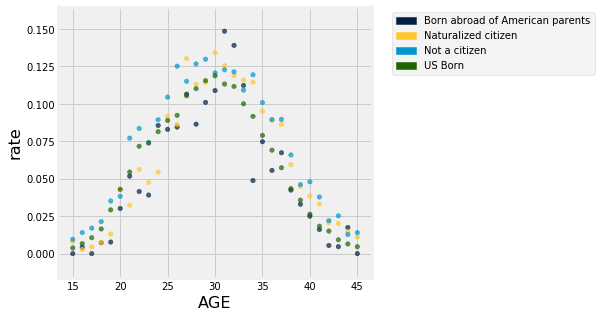

In [47]:
## try it out on the 'citizen' variable
asfr_citz=genASFR('citizen')
#NOTE that since the second argument fert has a default value specified... we don't need to include it in the 
# function call
asfr_citz.scatter('AGE','rate',colors='citizen')

## On the bright side ... our new genASFR function worked ...right?

But once again, we have a plot that could be more useful if the categories were broadened...

We've done this drill a few times we'll use a function within .apply() to recode the citizen
into Immigrant and USBorn.

In [48]:
## as we did above -- we'll create a function that maps the 4 kinds of citizenship onto a smaller
## number of categories (2) and then we'll call that function in a .apply() method nested in an append_collumnt


def immigrant(var) :
    """
    maps the variable var onto immigrant or nonimmigrant var needs to be coded like the citizen variable
    """
    if var in ['Born abroad of American parents','US Born'] :
        out="USBorn"
    elif var in ['Not a citizen', 'Naturalized citizen']:
        out="Immigrant"
    else :
        print('value:{0} is not on the menu'.format(var))
    return(out)

fert.append_column('immig',fert.apply(immigrant,'citizen'))
fert.show(5)
    

statefip,region,educ,fertyr,AGE,YRSUSA1,citizen,race,hispan,raceEth,EDUC,CITIZEN,fert10,immig,educ2
Alabama,East South Central Div.,5+ years of college,No,35,0,US Born,White,Not Hispanic,NH:White,11,0,0,USBorn,SomeCollege
Alabama,East South Central Div.,4 years of college,No,25,0,US Born,White,Not Hispanic,NH:White,10,0,0,USBorn,SomeCollege
Alabama,East South Central Div.,5+ years of college,No,32,0,US Born,White,Not Hispanic,NH:White,11,0,0,USBorn,SomeCollege
Alabama,East South Central Div.,4 years of college,No,27,27,Born abroad of American parents,Black/Negro,Not Hispanic,NH:Black,10,1,0,USBorn,SomeCollege
Alabama,East South Central Div.,Grade 12,No,37,0,US Born,Black/Negro,Not Hispanic,NH:Black,6,0,0,USBorn,HighSchool


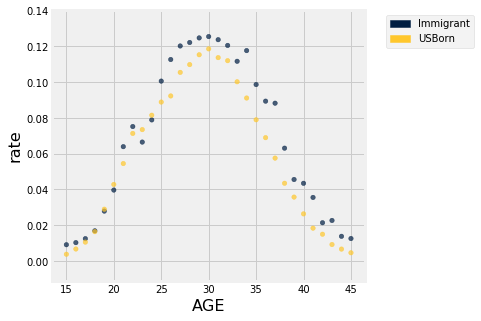

In [49]:
## Then we'll use our genASFR function and draw the scatter
ASFcitz=genASFR('immig')
ASFcitz.scatter('AGE','rate',colors='immig')

## So immigrant status matters too

Let's compute the TFRs to compare

In [50]:
out="""
TFRs by immigrant status
Immigrants:{0}
US Born:   {1}
""".format(np.sum(ASFcitz.where('immig','Immigrant').column('rate')),
           np.sum(ASFcitz.where('immig','USBorn').column('rate')))
print(out)


TFRs by immigrant status
Immigrants:2.113005419590368
US Born:   1.8006468654167775



## How about the effect of education on fertility

Let's flook  at the difference in fertility behavior of immigrants vs US born women of 
various education levels -- in other words:  are the fertility effects of education the same for immigrant and US born women?

In [51]:
## NOTE that by feeding genASFR a subset of fert we can compute the ASFrate of immigrants
## by education level
ASFimmigEduc2=genASFR('educ2',fert=fert.where('immig','Immigrant'))
## and of course we can do likewise for US born
ASFusbornEduc2=genASFR('educ2',fert=fert.where('immig','USBorn'))

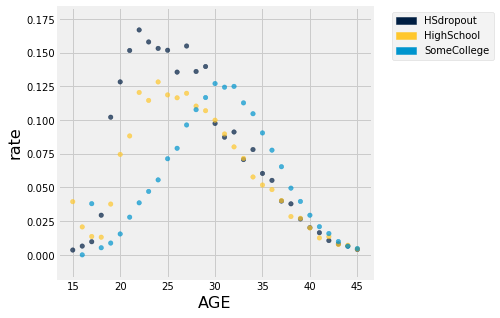

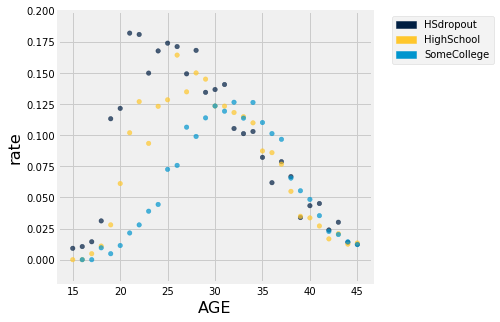

In [52]:
##  And the scatter plots
ASFusbornEduc2.scatter('AGE','rate',colors='educ2')
ASFimmigEduc2.scatter('AGE','rate',colors='educ2')

## And finally we are in a position to answer the question first posed:

#### Does education alone explain the fertility difference between immigrant and US born women?

To answer the question we'll compute the TFRs of six distinct groups of women:

US born with Some college, US born with High School only, US born without High School
and the corresponding three for immigrant women.

#### review of what we have learned so far:

We learned very early in this lab that there is a difference in the average number of times that immigrant and US women gave birth in 2015. Specifically:

<pre>
Immigrants:0.07048889718231013 USborn:0.056854223894562426
</pre>

We later computed the ASFRs and  TFRs of the two groups and found:
<pre>
TFRs by immigrant status
Immigrants:2.113005419590368
US Born:   1.8006468654167775
</pre>

which tells us that it is NOT simply a matter of the age distribution -- meaning it is not just that immigrant women happen to be of the ages when women give birth most frequently.

But we also computed TFRs for women by education status and we found that education also matters quite a lot -- with less educated women generally having higher fertility.

<pre>
TFR by education:
Some College:1.7334997550613978
High Schoo:1.9641973495478962
HS Dropout:2.54781441640368
</pre>

So now the question becomes:  is it possible to "explain" the difference in fertility between immigrant and US born women as simply an 'artifact' of a difference in education levels -- in other words,  could it be that immigrant women have more babies (at each age) just because they have less education ? in other words could it be that the fertility differences observed between immigrant and US born women are really just the fertility differences that we observed between more and less educated women?

### The final challenge of this lab is to answer that question:  Is it possible to explain the difference between the fertilities of US born and immigrant women as simply an artifact of the difference in education levels?

HINT: your instructor believes that the TFR of US born women with less than a highschool education is 2.33819.


In [55]:
#HIDE>
ASFusbornEduc2.select('educ2','rate').groups('educ2',collect=np.nansum).show()
ASFimmigEduc2.select('educ2','rate').groups('educ2',collect=np.nansum).show()
#HIDE<

educ2,rate nansum
HSdropout,2.33819
HighSchool,1.88356
SomeCollege,1.71167


educ2,rate nansum
HSdropout,2.85371
HighSchool,2.32445
SomeCollege,1.81583


In [61]:
cquiz('fert0-07')

In [57]:
cquiz('fert0-rate')

## That's it for this week's lab ... now on to the reading

The reading for Tuesday is 